**Prática de Histogramas**

1) 
- Produza a imagem ‘negativa’ do arquivo ‘im_cells.png’
- Com a imagem negativa, produza a imagem original novamente. 
- Mostre lado a lado a imagem original e a negativa. Em qual deles os objetos presentes na imagem são melhor percebidos? Justifique.
- Aplique a imagem uma função logarítmica.


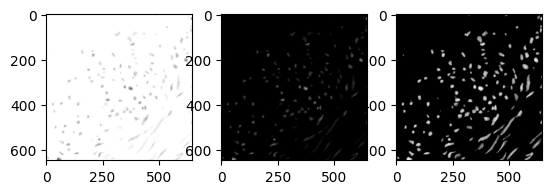

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('im_cells.png')

def inverteImage(img):
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      newColor = (255- img[i][j][0])
      img[i][j] = [newColor]*3
  return img

invertida1 = inverteImage(img)
plt.subplot(1, 3, 1)
plt.imshow(invertida1)
invertida2 = inverteImage(invertida1)
plt.subplot(1, 3, 2)
plt.imshow(invertida2)

# Na imagem que foi invertida a primeria vez é mais facil ver, os objetos ficam mais perceptiveis principalmente quando não são muito densos,
# como os do canto infeiro esquerdo

#aplicando log na imagem
c = 255 / np.log(1 + np.max(img))
log_img = c * np.log(1 + img)

log_img = np.array(log_img, dtype=np.uint8) #o np.log muda o tipo e não tava deixando plotar, teve que mudar o tipo

plt.subplot(1, 3, 3)
plt.imshow(log_img)

2)
- Abra a imagem 'pout.tif' e mostre seu histograma.
- Equalize a imagem anterior e mostre novamente seu histograma. Mostra a curva de transformação (consulte https://www.mathworks.com/help/images/histogram-equalization.html)
(procurar função OpenCV)



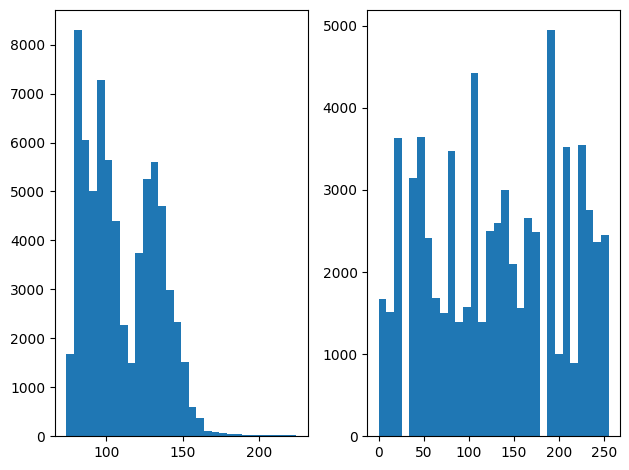

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def countRecurrence(imgArray, size):
  recurrenceArray = [0]*size
  for img in imgArray:
    recurrenceArray[img] += 1
  return recurrenceArray

img = cv2.imread('pout.tif', 0)
imgArray = []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    imgArray.append(img[i][j])

plt.subplot(1,2,1)
plt.hist(imgArray, bins=30)

recurrence = countRecurrence (imgArray, len(imgArray))

q = cv2.equalizeHist(img)
plt.subplot(1,2,2)
plt.hist(q.ravel(), bins=30) # ravel é pra achatar em uma dimensão pq a gente tem uma matriz

plt.tight_layout()
plt.show()

3) *Implemente* o algoritmo de equalização de histograma e aplique a imagem ‘imcells.png’. Use o mínimos de laços for - tente realizar operações diretas com matrizes e vetores do numpy
- Aplique o mesmo algortimo 2x na mesma imagem e compare os resultados

C:\Users\victo\AppData\Local\Temp\ipykernel_14808\2929836119.py:28: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(img.flatten(), 256, [0, 256], color='r')
C:\Users\victo\AppData\Local\Temp\ipykernel_14808\2929836119.py:40: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(q.flatten(), 256, [0, 256], color='g')
C:\Users\victo\AppData\Local\Temp\ipykernel_14808\2929836119.py:52: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(q2.flatten(), 256, [0, 256], color='b')


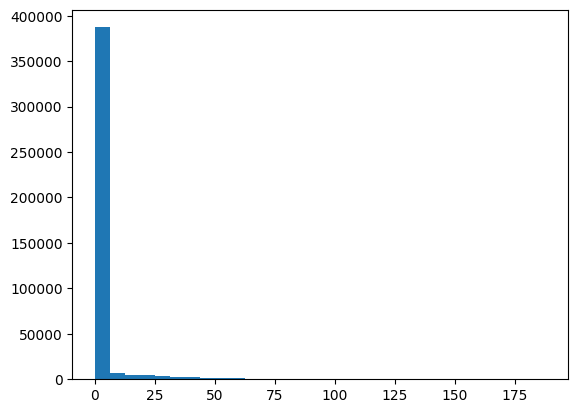

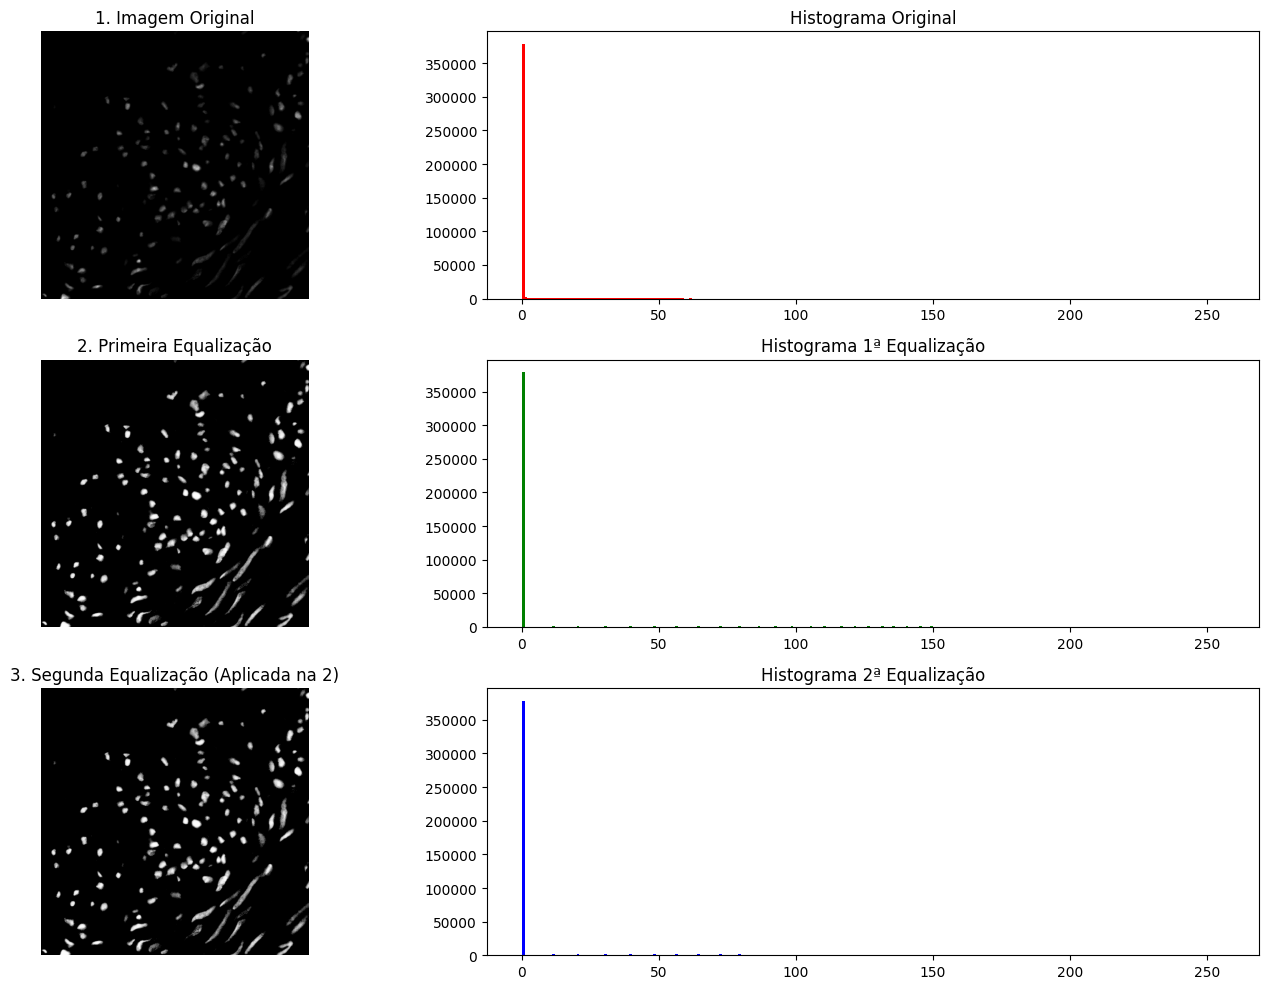

In [13]:
def countRecurrence(imgArray, size):
  recurrenceArray = [0]*size
  for img in imgArray:
    recurrenceArray[img] += 1
  return recurrenceArray

img = cv2.imread('im_cells.png', 0)
imgArray = []
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    imgArray.append(img[i][j])
plt.hist(imgArray, bins=30)

recurrence = countRecurrence (imgArray, len(imgArray))


q = cv2.equalizeHist(img)

plt.figure(figsize=(15, 10))

# Original
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("1. Imagem Original")
plt.axis('off')

plt.subplot(3, 2, 2)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.title("Histograma Original")

q = cv2.equalizeHist(img)

# Primeira Equalização
plt.subplot(3, 2, 3)
plt.imshow(q, cmap='gray')
plt.title("2. Primeira Equalização")
plt.axis('off')

plt.subplot(3, 2, 4)
plt.hist(q.flatten(), 256, [0, 256], color='g')
plt.title("Histograma 1ª Equalização")

q2 = cv2.equalizeHist(q)

# Segunda Equalização
plt.subplot(3, 2, 5)
plt.imshow(q2, cmap='gray')
plt.title("3. Segunda Equalização (Aplicada na 2)")
plt.axis('off')

plt.subplot(3, 2, 6)
plt.hist(q2.flatten(), 256, [0, 256], color='b')
plt.title("Histograma 2ª Equalização")

plt.tight_layout()
plt.show()